In [2]:
import pandas as pd
agency = pd.read_csv("C:\\Users\\Mtronics Computers\\Downloads\\DMRC_GTFS\\agency.txt")
print(agency)

  agency_id                   agency_name                      agency_url  \
0      DMRC  Delhi Metro Rail Corporation  http://www.delhimetrorail.com/   

  agency_timezone  agency_lang  agency_phone  agency_fare_url  agency_email  
0    Asia/Kolkata          NaN           NaN              NaN           NaN  


In [3]:
calendar = pd.read_csv('C:\\Users\\Mtronics Computers\\Downloads\\DMRC_GTFS\\calendar.txt')
print(calendar)

  service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
0    weekday       1        1          1         1       1         0       0   
1   saturday       0        0          0         0       0         1       0   
2     sunday       0        0          0         0       0         0       1   

   start_date  end_date  
0    20190101  20251231  
1    20190101  20251231  
2    20190101  20251231  


In [4]:
routes = pd.read_csv('C:\\Users\\Mtronics Computers\\Downloads\\DMRC_GTFS\\routes.txt')
print(routes)

    route_id  agency_id route_short_name  \
0         33        NaN           R_SP_R   
1         31        NaN           G_DD_R   
2         29        NaN           P_MS_R   
3         12        NaN             M_JB   
4         11        NaN             P_MS   
5         18        NaN           R_RD_R   
6          9        NaN             V_KB   
7          1        NaN             R_RS   
8         22        NaN           Y_HQ_R   
9          8        NaN             G_IB   
10         0        NaN             R_RD   
11        17        NaN             A_ND   
12        28        NaN           V_KR_R   
13        19        NaN           R_RS_R   
14         4        NaN             Y_HQ   
15         5        NaN             B_DN   
16        30        NaN           M_JB_R   
17         6        NaN             B_DV   
18         3        NaN             Y_QV   
19        16        NaN             A_NN   
20         7        NaN             G_KB   
21        10        NaN         

In [5]:
shapes = pd.read_csv('C:\\Users\\Mtronics Computers\\Downloads\\DMRC_GTFS\\shapes.txt')
stop_times = pd.read_csv('C:\\Users\\Mtronics Computers\\Downloads\\DMRC_GTFS\\stop_times.txt')
stops = pd.read_csv('C:\\Users\\Mtronics Computers\\Downloads\\DMRC_GTFS\\stops.txt')
trips = pd.read_csv('C:\\Users\\Mtronics Computers\\Downloads\\DMRC_GTFS\\trips.txt')


In [6]:
data_overviews = {
    "agency": agency.head(),
    "calendar": calendar.head(),
    "routes": routes.head(),
    "shapes": shapes.head(),
    "stop_times": stop_times.head(),
    "stops": stops.head(),
    "trips": trips.head()
}

In [7]:
print(data_overviews)

{'agency':   agency_id                   agency_name                      agency_url  \
0      DMRC  Delhi Metro Rail Corporation  http://www.delhimetrorail.com/   

  agency_timezone  agency_lang  agency_phone  agency_fare_url  agency_email  
0    Asia/Kolkata          NaN           NaN              NaN           NaN  , 'calendar':   service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
0    weekday       1        1          1         1       1         0       0   
1   saturday       0        0          0         0       0         1       0   
2     sunday       0        0          0         0       0         0       1   

   start_date  end_date  
0    20190101  20251231  
1    20190101  20251231  
2    20190101  20251231  , 'routes':    route_id  agency_id route_short_name  \
0        33        NaN           R_SP_R   
1        31        NaN           G_DD_R   
2        29        NaN           P_MS_R   
3        12        NaN             M_JB   
4        11   

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

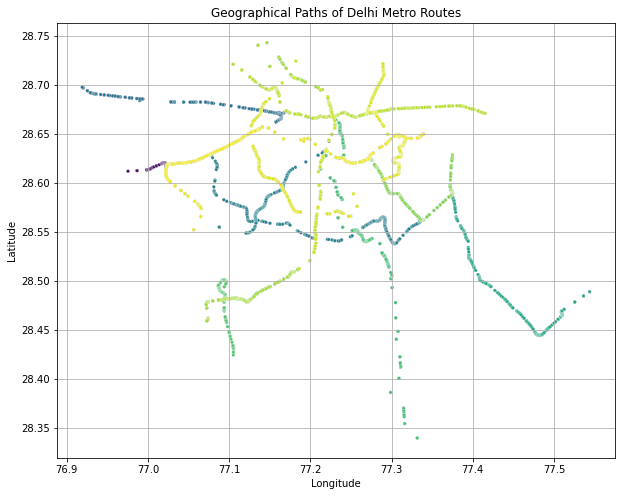

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='shape_pt_lon', y='shape_pt_lat', hue='shape_id', data=shapes, palette='viridis', s=10, legend=None)
plt.title('Geographical Paths of Delhi Metro Routes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

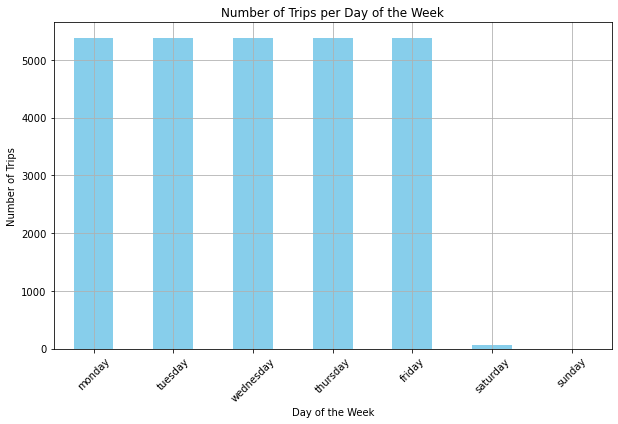

In [10]:
trips_calendar = pd.merge(trips, calendar, on='service_id', how='left')

# count the number of trips per day of the week
trip_counts = trips_calendar[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum()

# Plotting
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

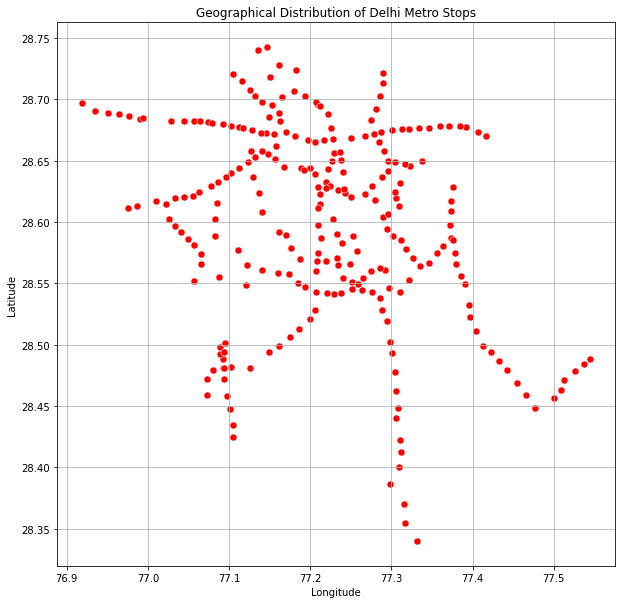

In [11]:
# plotting the locations of the stops
plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', data=stops, color='red', s=50, marker='o')
plt.title('Geographical Distribution of Delhi Metro Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

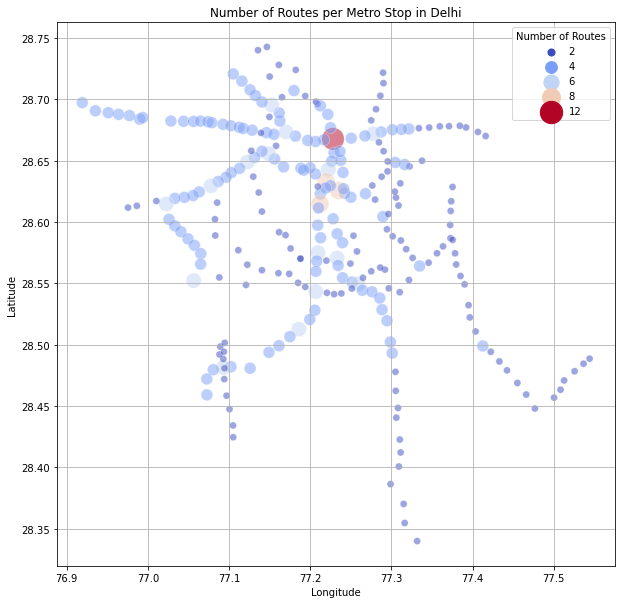

In [12]:
# merge stops with stop_times to link each stop with trips, and then merge with trips to get route information
stops_with_routes = pd.merge(pd.merge(stop_times, trips, on='trip_id'), routes, on='route_id')

# count how many unique routes pass through each stop
stop_route_counts = stops_with_routes.groupby('stop_id')['route_id'].nunique().reset_index()
stop_route_counts = stop_route_counts.rename(columns={'route_id': 'number_of_routes'})

# merge this with stops to get the names and location for plotting
stop_route_counts = pd.merge(stop_route_counts, stops, on='stop_id')

# plot the number of routes per stop
plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', size='number_of_routes', hue='number_of_routes',
                sizes=(50, 500), alpha=0.5, palette='coolwarm', data=stop_route_counts)
plt.title('Number of Routes per Metro Stop in Delhi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of Routes')
plt.grid(True)
plt.show()

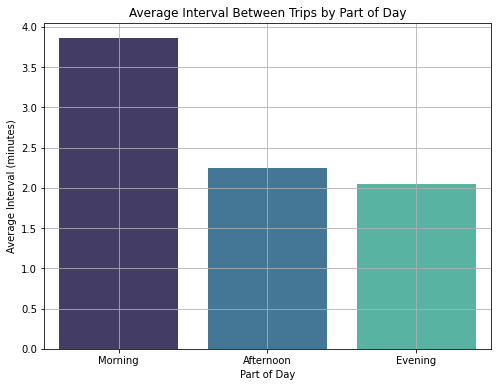

In [13]:
# Import required libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert time string to datetime.time
def convert_to_time(time_str):
    try:
        return dt.datetime.strptime(time_str, '%H:%M:%S').time()
    except ValueError:
        # Handle cases where the hour might be greater than 23 (e.g., 24:00:00 or 25:00:00)
        hour, minute, second = map(int, time_str.split(':'))
        return dt.time(hour % 24, minute, second)

# Convert 'arrival_time' column to datetime.time
stop_times['arrival_time_dt'] = stop_times['arrival_time'].apply(convert_to_time)

# Sort by stop_id and arrival_time
stop_times_sorted = stop_times.sort_values(by=['stop_id', 'arrival_time_dt'])

# Calculate the next arrival time for each stop
stop_times_sorted['next_arrival_time'] = stop_times_sorted.groupby('stop_id')['arrival_time_dt'].shift(-1)

# Function to calculate the difference in minutes between two times
def time_difference(time1, time2):
    if pd.isna(time1) or pd.isna(time2):
        return None
    full_date_time1 = dt.datetime.combine(dt.date.today(), time1)
    full_date_time2 = dt.datetime.combine(dt.date.today(), time2)
    return (full_date_time2 - full_date_time1).seconds / 60

# Calculate the interval in minutes between trips
stop_times_sorted['interval_minutes'] = stop_times_sorted.apply(
    lambda row: time_difference(row['arrival_time_dt'], row['next_arrival_time']), axis=1
)

# Drop rows with NaN values in 'interval_minutes' and create a copy
stop_times_intervals = stop_times_sorted.dropna(subset=['interval_minutes']).copy()

# Function to classify time into parts of the day
def part_of_day(time):
    if time < dt.time(12, 0):
        return 'Morning'
    elif time < dt.time(17, 0):
        return 'Afternoon'
    else:
        return 'Evening'

# Add 'part_of_day' column
stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)

# Calculate average intervals by part of the day
average_intervals = stop_times_intervals.groupby('part_of_day')['interval_minutes'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(8, 6))
sns.barplot(
    x='part_of_day',
    y='interval_minutes',
    data=average_intervals,
    order=['Morning', 'Afternoon', 'Evening'],
    palette='mako'
)
plt.title('Average Interval Between Trips by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Average Interval (minutes)')
plt.grid(True)
plt.show()



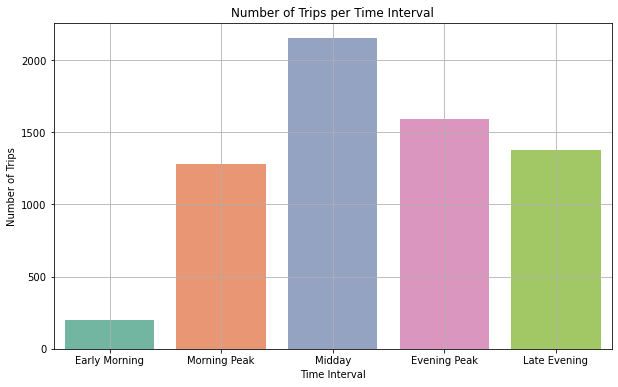

In [14]:
# define time intervals for classification
def classify_time_interval(time):
    if time < dt.time(6, 0):
        return 'Early Morning'
    elif time < dt.time(10, 0):
        return 'Morning Peak'
    elif time < dt.time(16, 0):
        return 'Midday'
    elif time < dt.time(20, 0):
        return 'Evening Peak'
    else:
        return 'Late Evening'

# apply time interval classification
stop_times['time_interval'] = stop_times['arrival_time_dt'].apply(classify_time_interval)

# count the number of trips per time interval
# Ensure categorical ordering of time_interval
ordered_intervals = ['Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Late Evening']
stop_times['time_interval'] = pd.Categorical(
    stop_times['time_interval'], 
    categories=ordered_intervals, 
    ordered=True
)

# Group by and count trips per interval
trips_per_interval = (
    stop_times.groupby('time_interval', observed=True)['trip_id']  # Explicitly set observed=True
    .nunique()
    .reset_index()
    .rename(columns={'trip_id': 'number_of_trips'})
)

# Ensure all categories are represented (even with 0 trips)
trips_per_interval = trips_per_interval.sort_values('time_interval')

# Fill missing categories with 0 trips
trips_per_interval = trips_per_interval.set_index('time_interval').reindex(ordered_intervals).fillna(0).reset_index()

# Plotting the number of trips per time interval
plt.figure(figsize=(10, 6))
sns.barplot(
    x='time_interval', 
    y='number_of_trips', 
    data=trips_per_interval, 
    palette='Set2'
)
plt.title('Number of Trips per Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


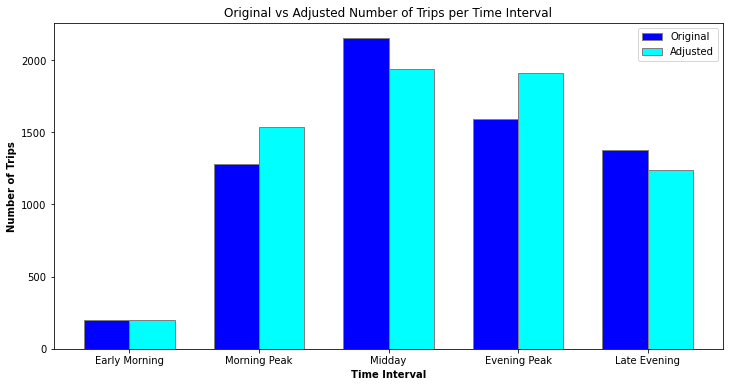

In [15]:
# adjusting frequencies based on hypothetical scenario
adjusted_trips_per_interval = trips_per_interval.copy()
adjustment_factors = {'Morning Peak': 1.20, 'Evening Peak': 1.20, 'Midday': 0.90, 'Early Morning': 1.0, 'Late Evening': 0.90}

# apply the adjustments
adjusted_trips_per_interval['adjusted_number_of_trips'] = adjusted_trips_per_interval.apply(
    lambda row: int(row['number_of_trips'] * adjustment_factors[row['time_interval']]), axis=1)

# plotting original vs adjusted number of trips per time interval
plt.figure(figsize=(12, 6))
bar_width = 0.35
r1 = range(len(adjusted_trips_per_interval))
r2 = [x + bar_width for x in r1]

plt.bar(r1, adjusted_trips_per_interval['number_of_trips'], color='blue', width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, adjusted_trips_per_interval['adjusted_number_of_trips'], color='cyan', width=bar_width, edgecolor='grey', label='Adjusted')

plt.xlabel('Time Interval', fontweight='bold')
plt.ylabel('Number of Trips', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(adjusted_trips_per_interval))], adjusted_trips_per_interval['time_interval'])
plt.title('Original vs Adjusted Number of Trips per Time Interval')
plt.legend()

plt.show()